In [3]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [4]:
# API to fetch the dataset from Kaggle
!kaggle datasets download -d omkargurav/face-mask-dataset

 94% 153M/163M [00:01<00:00, 172MB/s]
100% 163M/163M [00:01<00:00, 123MB/s]


In [8]:
# extracting the compessed Dataset
from zipfile import ZipFile
dataset = '/content/face-mask-dataset.zip'

with ZipFile(dataset,'r') as zip:
  zip.extractall()
  print('The dataset is extracted')

The dataset is extracted


In [9]:
! ls

data  face-mask-dataset.zip  kaggle.json  sample_data


In [22]:
#  importing the dependencies

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
from google.colab.patches import cv2_imshow
from PIL import Image
from sklearn.model_selection import train_test_split

In [12]:
import os

In [13]:
with_mask_file  = os.listdir('/content/data/with_mask')
print(with_mask_file[0:5])
print(with_mask_file[-5:])

['with_mask_43.jpg', 'with_mask_871.jpg', 'with_mask_3379.jpg', 'with_mask_2469.jpg', 'with_mask_849.jpg']
['with_mask_1075.jpg', 'with_mask_1675.jpg', 'with_mask_42.jpg', 'with_mask_1068.jpg', 'with_mask_3303.jpg']


In [24]:
without_mask_file  = os.listdir('/content/data/without_mask')
print(with_mask_file[0:5])
print(without_mask_file[-5:])

['with_mask_43.jpg', 'with_mask_871.jpg', 'with_mask_3379.jpg', 'with_mask_2469.jpg', 'with_mask_849.jpg']
['without_mask_1945.jpg', 'without_mask_2981.jpg', 'without_mask_747.jpg', 'without_mask_1143.jpg', 'without_mask_3618.jpg']


In [15]:
print('Number of with mask images:',len(with_mask_file))
print('Number of without mask images:',len(without_mask_file))

Number of with mask images: 3725
Number of without mask images: 3828


In [16]:
#  creating label for two class of images
#  with mask --> 1
#  without mask --> 0

with_mask_labels = [1]*3725
without_mask_labels = [0]*3828

In [19]:
print(with_mask_labels[0:5])
print(without_mask_labels[0:5])

[1, 1, 1, 1, 1]
[0, 0, 0, 0, 0]


In [20]:
labels = with_mask_labels + without_mask_labels
print(len(labels))
print(labels[0:5])
print(labels[-5:])

7553
[1, 1, 1, 1, 1]
[0, 0, 0, 0, 0]


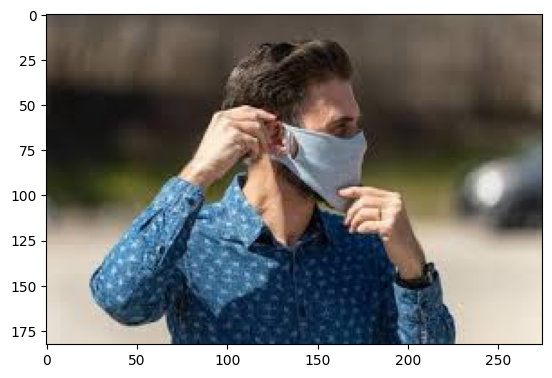

In [23]:
#  displaying with mask image

img = mpimg.imread('/content/data/with_mask/with_mask_2590.jpg')
imgplot=plt.imshow(img)
plt.show()

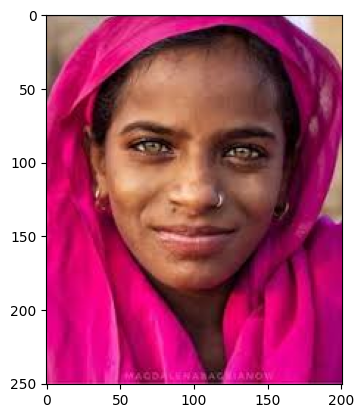

In [25]:
#  displaying without mask image

img = mpimg.imread('/content/data/without_mask/without_mask_1945.jpg')
imgplot=plt.imshow(img)
plt.show()

In [26]:
#  image processing

#  1. resizing images
#  2. convert the images to numpy array

In [30]:
with_mask_path = '/content/data/with_mask/'

data = []

for img_file in with_mask_file:

  image = Image.open(with_mask_path + img_file)
  image = image.resize((128,128))
  image = image.convert('RGB')
  image = np.array(image)
  data.append(image)



without_mask_path = '/content/data/without_mask/'


for img_file in without_mask_file:

  image = Image.open(without_mask_path + img_file)
  image = image.resize((128,128))
  image = image.convert('RGB')
  image = np.array(image)
  data.append(image)

array([[[158, 183, 181],
        [157, 182, 179],
        [154, 179, 176],
        ...,
        [ 51,  29,  14],
        [ 53,  30,  16],
        [ 53,  30,  16]],

       [[164, 188, 188],
        [163, 188, 186],
        [160, 186, 183],
        ...,
        [ 51,  28,  13],
        [ 52,  29,  15],
        [ 52,  29,  15]],

       [[165, 191, 192],
        [164, 191, 191],
        [162, 189, 188],
        ...,
        [ 50,  27,  13],
        [ 50,  27,  13],
        [ 50,  27,  13]],

       ...,

       [[219, 251, 251],
        [218, 251, 251],
        [217, 251, 250],
        ...,
        [ 99,  54,  34],
        [100,  55,  35],
        [101,  56,  35]],

       [[223, 250, 250],
        [221, 249, 250],
        [218, 248, 248],
        ...,
        [103,  58,  36],
        [103,  58,  37],
        [103,  58,  37]],

       [[222, 243, 245],
        [220, 243, 243],
        [217, 242, 242],
        ...,
        [105,  60,  41],
        [104,  59,  41],
        [104,  59,  40]]], dtype=uint8)
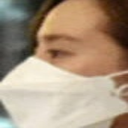

In [31]:
data[0]

In [33]:
#  converting label and image list to numpy array

X = np.array(data)
Y = np.array(labels)

In [34]:
print(X.shape)
print(Y.shape)

(7553, 128, 128, 3)
(7553,)


In [35]:
#  train_test_split

X_train,X_test,Y_train,Y_test = train_test_split(X,Y, test_size = 0.2, random_state = 2)

In [37]:
print(X.shape, X_train.shape,X_test.shape)

(7553, 128, 128, 3) (6042, 128, 128, 3) (1511, 128, 128, 3)


In [38]:
#  scaling of data
X_train_scale = X_train/255
X_test_scale = X_test/255

In [39]:
#  builing a convulational neural network
import tensorflow as tf
from tensorflow import keras


In [44]:
num_of_classes = 2
model = keras.Sequential()
model.add(keras.layers.Conv2D(32, kernel_size = (3,3), activation  = 'relu', input_shape = (128,128,3)))
model.add(keras.layers.MaxPooling2D(pool_size = (2,22)))


model.add(keras.layers.Conv2D(32, kernel_size = (3,3), activation  = 'relu'))
model.add(keras.layers.MaxPooling2D(pool_size = (2,2)))

model.add(keras.layers.Flatten())

model.add(keras.layers.Dense(128, activation = 'relu'))
model.add(keras.layers.Dropout(0.5))

model.add(keras.layers.Dense(64, activation = 'relu'))
model.add(keras.layers.Dropout(0.5))

model.add(keras.layers.Dense(num_of_classes, activation = 'sigmoid'))





In [46]:
#  compiling the nueral network model

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['acc'])

In [49]:
#  training our neural network
history = model.fit(X_train_scale, Y_train, validation_split = 0.1,epochs = 5)

Epoch 1/5
170/170 [==============================] - 10s 16ms/step - loss: 0.5378 - acc: 0.7177 - val_loss: 0.3132 - val_acc: 0.8628
Epoch 2/5
170/170 [==============================] - 2s 12ms/step - loss: 0.2975 - acc: 0.8749 - val_loss: 0.2341 - val_acc: 0.9091
Epoch 3/5
170/170 [==============================] - 2s 12ms/step - loss: 0.2547 - acc: 0.8946 - val_loss: 0.1989 - val_acc: 0.9273
Epoch 4/5
170/170 [==============================] - 2s 14ms/step - loss: 0.2497 - acc: 0.8970 - val_loss: 0.2031 - val_acc: 0.9223
Epoch 5/5
170/170 [==============================] - 2s 11ms/step - loss: 0.2208 - acc: 0.9108 - val_loss: 0.1825 - val_acc: 0.9289


In [50]:
#  model_evalauation

loss,accuracy = model.evaluate(X_test_scale,Y_test)
print('Test Accuracy:', accuracy)

48/48 [==============================] - 1s 13ms/step - loss: 0.2017 - acc: 0.9206
Test Accuracy: 0.9205824136734009


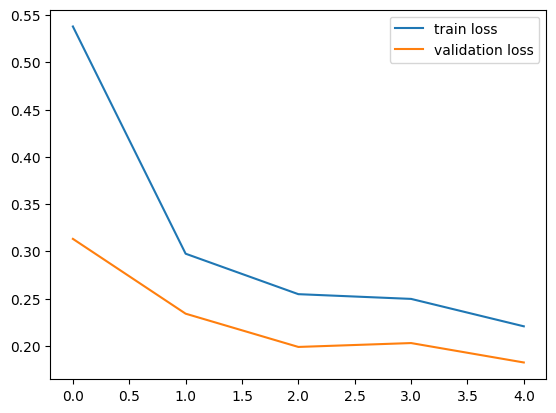

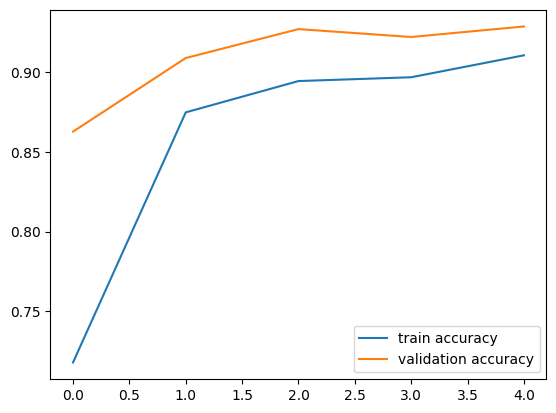

In [52]:
h = history

# plot the loss value
plt.plot(h.history['loss'], label='train loss')
plt.plot(h.history['val_loss'], label='validation loss')
plt.legend()
plt.show()

# plot the accuracy value
plt.plot(h.history['acc'], label='train accuracy')
plt.plot(h.history['val_acc'], label='validation accuracy')
plt.legend()
plt.show()

path of image to be predicted:/content/Face-Mask-Wear-Care.jpg


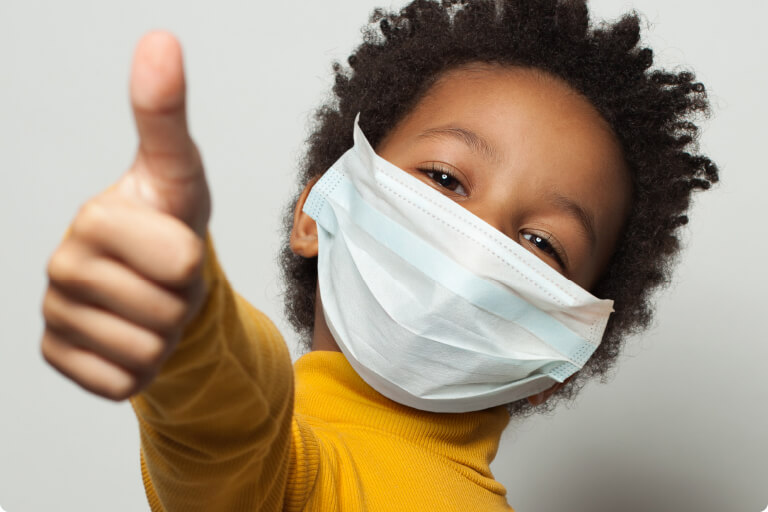

1/1 [==============================] - 1s 512ms/step
[[0.26616186 0.60372794]]
1
The person in the image is wearing a mask


In [53]:
# building a predictive system
input_image_path = input('path of image to be predicted:')
input_image = cv2.imread(input_image_path)
cv2_imshow(input_image)
input_image_resized = cv2.resize(input_image, (128,128))
input_image_scaled = input_image_resized/255
input_image_reshaped = np.reshape(input_image_scaled,[1,128,128,3])
input_prediction = model.predict(input_image_reshaped)

print(input_prediction)

input_pred_label = np.argmax(input_prediction)
print(input_pred_label)

if  input_pred_label == 1:
  print('The person in the image is wearing a mask')

else:
  print('The person in the image is not wearing a mask')
